### Loading and Preprocessing Data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('data/sign_mnist_train.csv')
test_df = pd.read_csv('data/sign_mnist_test.csv')

In [3]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 214.7 MB


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     157     157     157     157     157     158   
2      2     187     188     188     188     188     188     188     188   
3      2     211     211     212     212     212     212     212     212   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
0     153  ...        207        207        207        207        206   
1     158  ...        149        163        175        175        175   
2     188  ...        202        201        200        199        199   
3     211  ...        235        234        233        231        230   
4     185  ...        133        163        163        163        164   

   pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
0        206        206        204        203        202  
1        175        175        149        149        149  
2        199        198        195        195        195  
3        229        229        229        229        163  
4        179        179        179        179        179  

[5 rows x 1025 columns]

In [3]:
# Preprocessing for Neural Networks
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 32, 32)
X_test = X_test.reshape(-1, 32, 32)

In [4]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

**Visualizing Images**

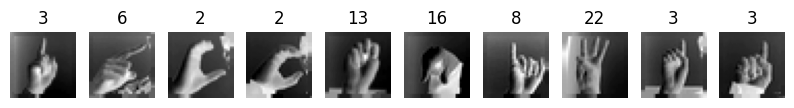

In [5]:
import matplotlib.pyplot as plt

def display_sample_images(X, y, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        ax = plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i], cmap='binary')
        plt.title(f"{y[i]}")
        plt.axis('off')
    plt.show()

display_sample_images(X_train, y_train)

**Baseline Model**

In [22]:
dnn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),  
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(25, activation='softmax')  
])

dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               262400    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 25)                3225      
                                                                 
Total params: 298521 (1.14 MB)
Trainable params: 298521 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
dnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history_1 = dnn_model.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=7)

Epoch 1/7


I0000 00:00:1723532624.316237   16950 service.cc:146] XLA service 0x7139e43186d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723532624.316253   16950 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-08-13 03:03:44.319239: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-13 03:03:44.326381: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-13 03:03:44.334540: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibil

858/858 [==============================] - 1s 887us/step - loss: 2.2013 - accuracy: 0.3396 - val_loss: 1.6827 - val_accuracy: 0.4983
Epoch 2/7
858/858 [==============================] - 1s 814us/step - loss: 1.2463 - accuracy: 0.6088 - val_loss: 1.3228 - val_accuracy: 0.5792
Epoch 3/7
858/858 [==============================] - 1s 833us/step - loss: 0.8585 - accuracy: 0.7328 - val_loss: 1.1666 - val_accuracy: 0.6099
Epoch 4/7
858/858 [==============================] - 1s 791us/step - loss: 0.6148 - accuracy: 0.8106 - val_loss: 1.0790 - val_accuracy: 0.6584
Epoch 5/7
858/858 [==============================] - 1s 851us/step - loss: 0.4316 - accuracy: 0.8707 - val_loss: 0.9852 - val_accuracy: 0.7192
Epoch 6/7
858/858 [==============================] - 1s 846us/step - loss: 0.3001 - accuracy: 0.9124 - val_loss: 0.9699 - val_accuracy: 0.7128
Epoch 7/7
858/858 [==============================] - 1s 818us/step - loss: 0.2224 - accuracy: 0.9407 - val_loss: 1.0330 - val_accuracy: 0.7284


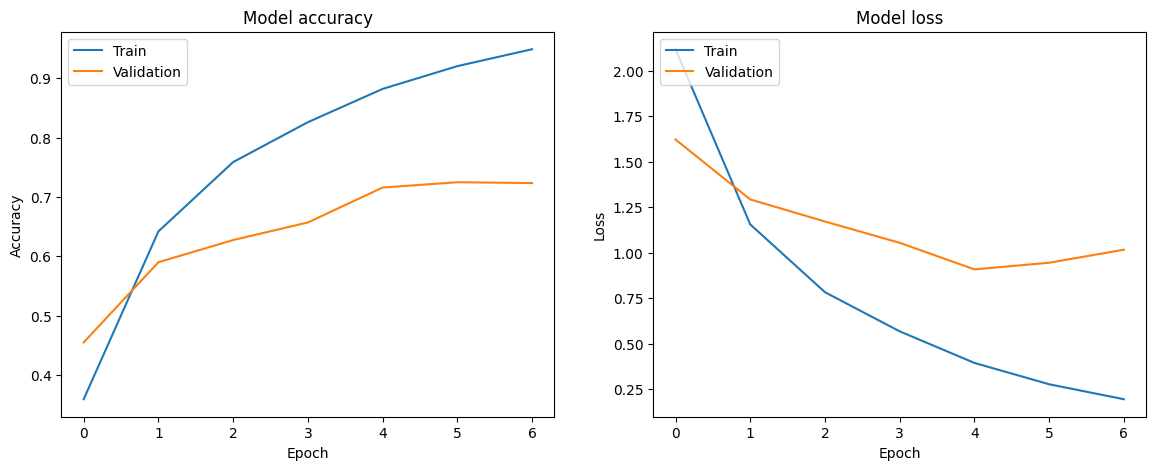

In [40]:
def plot_learning_curves(history):
    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_learning_curves(history_1)

### Optimizing Results

In the first training I observed that the model starts overfititng at about 7th epoch, so I first trained it until 7 epochs, and shall continue training from here at a **lower learning rate** (1/10th of the previous).


In [41]:
optimizer = keras.optimizers.Adam(learning_rate=0.00005)
dnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

history_2 = dnn_model.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=7)

Epoch 1/7
858/858 [==============================] - 5s 6ms/step - loss: 0.0985 - accuracy: 0.9886 - val_loss: 0.9287 - val_accuracy: 0.7454
Epoch 2/7
858/858 [==============================] - 5s 6ms/step - loss: 0.0885 - accuracy: 0.9910 - val_loss: 0.9348 - val_accuracy: 0.7426
Epoch 3/7
858/858 [==============================] - 5s 6ms/step - loss: 0.0811 - accuracy: 0.9923 - val_loss: 0.9196 - val_accuracy: 0.7499
Epoch 4/7
858/858 [==============================] - 5s 6ms/step - loss: 0.0742 - accuracy: 0.9947 - val_loss: 0.9284 - val_accuracy: 0.7524
Epoch 5/7
858/858 [==============================] - 5s 6ms/step - loss: 0.0687 - accuracy: 0.9953 - val_loss: 0.9673 - val_accuracy: 0.7521
Epoch 6/7
858/858 [==============================] - 5s 6ms/step - loss: 0.0627 - accuracy: 0.9960 - val_loss: 0.9624 - val_accuracy: 0.7404
Epoch 7/7
858/858 [==============================] - 5s 6ms/step - loss: 0.0582 - accuracy: 0.9966 - val_loss: 0.9628 - val_accuracy: 0.7446


Tuning the learning rate didn't help much, let's try adding **10% Dropout** to deal with the overfitting.

In [49]:
dnn_model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(25, activation='softmax')
])

In [50]:
# Initial round at LR = 5e-4
optimizer = keras.optimizers.Nadam(learning_rate=0.0005)
dnn_model_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

history_3 = dnn_model_2.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=6)

Epoch 1/6
858/858 [==============================] - 7s 7ms/step - loss: 1.9567 - accuracy: 0.3929 - val_loss: 1.3322 - val_accuracy: 0.5697
Epoch 2/6
858/858 [==============================] - 6s 7ms/step - loss: 0.9897 - accuracy: 0.6819 - val_loss: 1.0512 - val_accuracy: 0.6662
Epoch 3/6
858/858 [==============================] - 6s 7ms/step - loss: 0.6223 - accuracy: 0.7999 - val_loss: 0.9335 - val_accuracy: 0.7156
Epoch 4/6
858/858 [==============================] - 6s 7ms/step - loss: 0.4166 - accuracy: 0.8679 - val_loss: 0.8217 - val_accuracy: 0.7627
Epoch 5/6
858/858 [==============================] - 6s 7ms/step - loss: 0.2864 - accuracy: 0.9118 - val_loss: 0.7934 - val_accuracy: 0.7803
Epoch 6/6
858/858 [==============================] - 6s 7ms/step - loss: 0.2056 - accuracy: 0.9368 - val_loss: 0.7871 - val_accuracy: 0.7883


Again, the model tends to perform poorly on the validation set as compared to the training set and the validation accuracy doesn't improve much after 6th epoch. I'll continue using the same strategy of reducing learning rate whenever the validation accuracy doesn't improve for a few consecutive epochs (aka **Reduce LR on Plateau**), by manually watching each epoch.
I could have written a function to automate it, but since we only need less than 10 epochs each run, it's much easier this way.

In [51]:
# Next round at LR = 2e-4
optimizer = keras.optimizers.Nadam(learning_rate=0.0002)
dnn_model_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

history_4 = dnn_model_2.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
858/858 [==============================] - 7s 7ms/step - loss: 0.1162 - accuracy: 0.9705 - val_loss: 0.7504 - val_accuracy: 0.8112
Epoch 2/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0947 - accuracy: 0.9760 - val_loss: 0.7999 - val_accuracy: 0.8104
Epoch 3/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0822 - accuracy: 0.9793 - val_loss: 0.8468 - val_accuracy: 0.8051
Epoch 4/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0707 - accuracy: 0.9831 - val_loss: 0.7263 - val_accuracy: 0.8263
Epoch 5/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0609 - accuracy: 0.9863 - val_loss: 0.8026 - val_accuracy: 0.8132


In [52]:
# Next run at LR = 4e-5
optimizer = keras.optimizers.Nadam(learning_rate=0.00004)
dnn_model_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

history_5 = dnn_model_2.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
858/858 [==============================] - 7s 7ms/step - loss: 0.0344 - accuracy: 0.9942 - val_loss: 0.8362 - val_accuracy: 0.8193
Epoch 2/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0331 - accuracy: 0.9941 - val_loss: 0.7850 - val_accuracy: 0.8187
Epoch 3/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0306 - accuracy: 0.9950 - val_loss: 0.8185 - val_accuracy: 0.8229
Epoch 4/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0307 - accuracy: 0.9947 - val_loss: 0.7811 - val_accuracy: 0.8179
Epoch 5/5
858/858 [==============================] - 6s 7ms/step - loss: 0.0289 - accuracy: 0.9950 - val_loss: 0.8374 - val_accuracy: 0.8185


The model is still overfitting, but we have achieved our best validation accuracy so far, 82%. It is unlikely that it will improve any further with the current architecture. Here are the final results on the validation set.

In [53]:
val_loss, val_accuracy = dnn_model_2.evaluate(X_valid, y_valid)
print(f'Validation Accuracy: {val_accuracy}')

113/113 [==============================] - 0s 3ms/step - loss: 0.8374 - accuracy: 0.8185
Validation Accuracy: 0.8184607028961182


**Learning Curves for DNN**

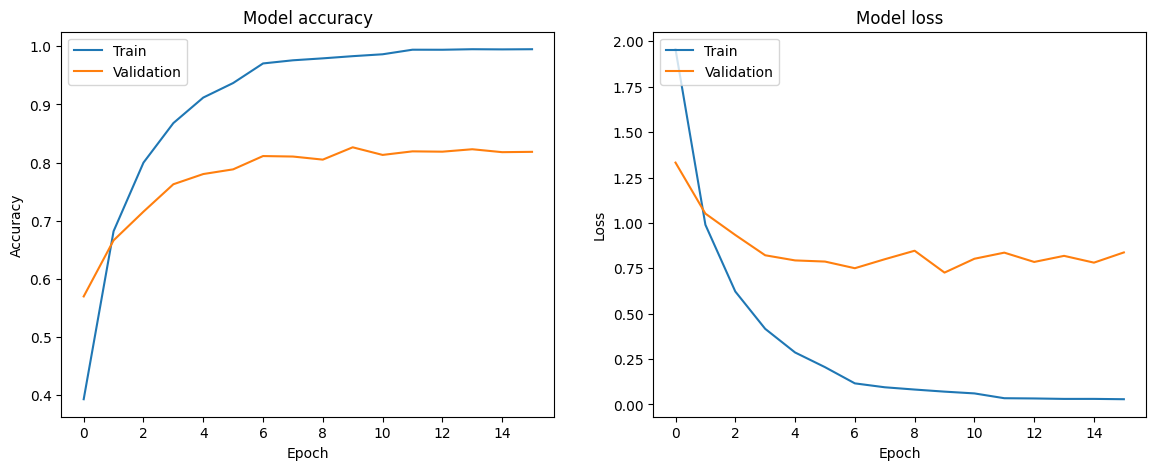

In [54]:
from tensorflow.keras.callbacks import History

# To concatenate multiple training runs for a single learning curve
class CombinedHistory(History):
    def __init__(self, histories):
        super().__init__()
        self.history = self._combine_histories(histories)
    
    def _combine_histories(self, histories):
        combined = {}
        for key in histories[0].history.keys():
            combined[key] = []
            for hist in histories:
                combined[key].extend(hist.history[key])
        return combined

combined_history_dnn = CombinedHistory([history_3, history_4, history_5])


plot_learning_curves(combined_history_dnn)

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

def evaluate_model_performance(model, X_valid, y_valid):
    y_pred = np.argmax(model.predict(X_valid), axis=1)
    
    # Calculate individual accuracies for each letter
    unique_labels = np.unique(y_valid)
    individual_accuracies = []
    
    for label in unique_labels:
        label_mask = (y_valid == label)
        accuracy = accuracy_score(y_valid[label_mask], y_pred[label_mask])
        individual_accuracies.append(accuracy)
    
    # Unbiased median accuracy
    median_accuracy = np.median(individual_accuracies)
    print(f"Unbiased Median Accuracy: {median_accuracy:.4f}")
    
    # Highest and lowest individual accuracy
    highest_accuracy = max(individual_accuracies)
    lowest_accuracy = min(individual_accuracies)
    highest_accuracy_letter = unique_labels[np.argmax(individual_accuracies)]
    lowest_accuracy_letter = unique_labels[np.argmin(individual_accuracies)]
    
    print(f"Highest Accuracy: {highest_accuracy:.4f} (Letter: {chr(highest_accuracy_letter + ord('A'))})")
    print(f"Lowest Accuracy: {lowest_accuracy:.4f} (Letter: {chr(lowest_accuracy_letter + ord('A'))})")
    
    # The three most common single types of errors
    errors = [(true, pred) for true, pred in zip(y_valid, y_pred) if true != pred]
    common_errors = Counter(errors).most_common(3)
    
    print("Three Most Common Errors:")
    for error, count in common_errors:
        true_label, pred_label = error
        print(f"True Label: {chr(true_label + ord('A'))}, Predicted: {chr(pred_label + ord('A'))}, Count: {count}")
    
    return {
        "median_accuracy": median_accuracy,
        "highest_accuracy": highest_accuracy,
        "highest_accuracy_letter": chr(highest_accuracy_letter + ord('A')),
        "lowest_accuracy": lowest_accuracy,
        "lowest_accuracy_letter": chr(lowest_accuracy_letter + ord('A')),
        "common_errors": common_errors
    }

metrics = evaluate_model_performance(dnn_model_2, X_valid, y_valid)

113/113 [==============================] - 0s 1ms/step
Unbiased Median Accuracy: 0.7952
Highest Accuracy: 1.0000 (Letter: A)
Lowest Accuracy: 0.4933 (Letter: N)
Three Most Common Errors:
True Label: T, Predicted: X, Count: 34
True Label: Y, Predicted: L, Count: 27
True Label: N, Predicted: A, Count: 24


The unbiased median accuracy is 79%; a little finetuning in the right direction could lead us to the desired results (94%). However, without wasting any time at this sub-optimal model, I'll start training a CNN since CNNs are much more suited to image tasks and I believe would give us better results for our time.

**Convolutional Network**

In [58]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

In [59]:
optimizer = keras.optimizers.Nadam(learning_rate=0.0005)
cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

history_6 = cnn_model.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
858/858 [==============================] - 7s 8ms/step - loss: 1.2094 - accuracy: 0.6529 - val_loss: 0.6850 - val_accuracy: 0.7752
Epoch 2/5
858/858 [==============================] - 7s 8ms/step - loss: 0.1426 - accuracy: 0.9700 - val_loss: 0.4788 - val_accuracy: 0.8472
Epoch 3/5
858/858 [==============================] - 7s 8ms/step - loss: 0.0277 - accuracy: 0.9982 - val_loss: 0.4724 - val_accuracy: 0.8673
Epoch 4/5
858/858 [==============================] - 7s 8ms/step - loss: 0.0104 - accuracy: 0.9993 - val_loss: 0.4858 - val_accuracy: 0.8938
Epoch 5/5
858/858 [==============================] - 7s 8ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4841 - val_accuracy: 0.8932


As expected, this simple CNN reaches around 90% accuracy in only 5 epochs. Although there's still a big gap between the training and validation scores, we can further reduce this by applying regularization through **50% Dropout**.

In [62]:
cnn_model_2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

In [63]:
cnn_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)        

In [64]:
optimizer = keras.optimizers.Nadam(learning_rate=0.0005)
cnn_model_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

history_7 = cnn_model_2.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
858/858 [==============================] - 8s 9ms/step - loss: 2.0067 - accuracy: 0.3952 - val_loss: 0.9214 - val_accuracy: 0.7192
Epoch 2/5
858/858 [==============================] - 8s 9ms/step - loss: 0.6209 - accuracy: 0.7953 - val_loss: 0.5046 - val_accuracy: 0.8447
Epoch 3/5
858/858 [==============================] - 8s 9ms/step - loss: 0.3260 - accuracy: 0.8928 - val_loss: 0.3370 - val_accuracy: 0.8887
Epoch 4/5
858/858 [==============================] - 8s 9ms/step - loss: 0.2068 - accuracy: 0.9326 - val_loss: 0.2930 - val_accuracy: 0.8991
Epoch 5/5
858/858 [==============================] - 8s 9ms/step - loss: 0.1463 - accuracy: 0.9521 - val_loss: 0.2694 - val_accuracy: 0.9211


In [65]:
# Next run at reduced LR
optimizer = keras.optimizers.Nadam(learning_rate=0.00025)
cnn_model_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

history_8 = cnn_model_2.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
858/858 [==============================] - 8s 9ms/step - loss: 0.0996 - accuracy: 0.9695 - val_loss: 0.2510 - val_accuracy: 0.9222
Epoch 2/5
858/858 [==============================] - 8s 9ms/step - loss: 0.0854 - accuracy: 0.9740 - val_loss: 0.2288 - val_accuracy: 0.9267
Epoch 3/5
858/858 [==============================] - 8s 9ms/step - loss: 0.0701 - accuracy: 0.9793 - val_loss: 0.2299 - val_accuracy: 0.9308
Epoch 4/5
858/858 [==============================] - 7s 9ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.2324 - val_accuracy: 0.9255
Epoch 5/5
858/858 [==============================] - 7s 9ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.2232 - val_accuracy: 0.9241


In [66]:
cnn_model_2.evaluate(X_valid, y_valid)

113/113 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9241


[0.22318823635578156, 0.9241494536399841]

**Learning Curves for CNN**

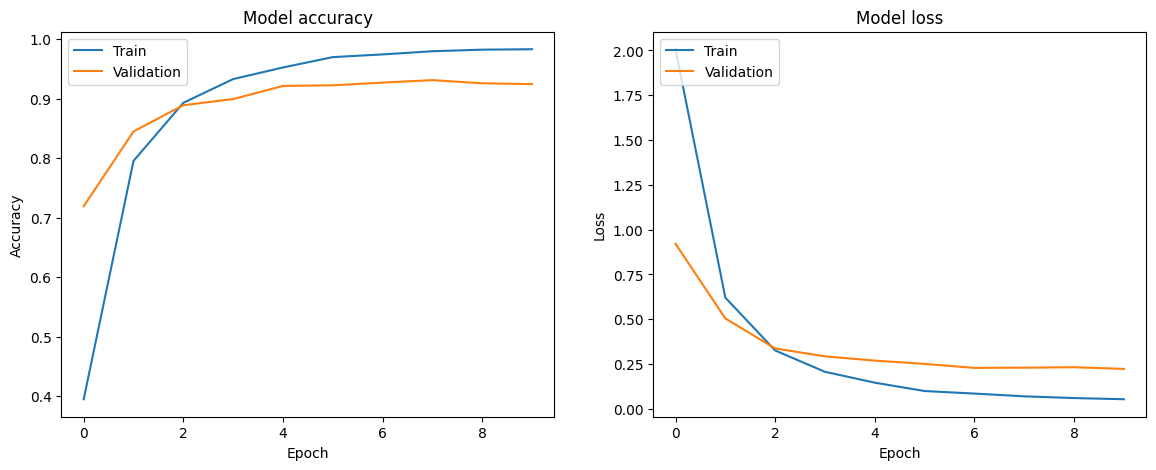

In [67]:
combined_history_cnn = CombinedHistory([history_7, history_8])
plot_learning_curves(combined_history_cnn)

In [68]:
metrics_cnn = evaluate_model_performance(cnn_model_2, X_valid, y_valid)

113/113 [==============================] - 0s 2ms/step
Unbiased Median Accuracy: 0.9697
Highest Accuracy: 1.0000 (Letter: A)
Lowest Accuracy: 0.5882 (Letter: T)
Three Most Common Errors:
True Label: H, Predicted: G, Count: 24
True Label: M, Predicted: S, Count: 20
True Label: T, Predicted: H, Count: 19


In [69]:
dnn_model_2.save('saved_models/dnn_model_2.keras')
cnn_model_2.save('saved_models/cnn_model_2.keras')

**Comparison and Selection of Models**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def evaluate_mean_and_individual_accuracies(model, X_valid, y_valid):
    y_pred = np.argmax(model.predict(X_valid), axis=1)
    
    # Overall mean accuracy
    overall_mean_accuracy = accuracy_score(y_valid, y_pred)
    print(f"Overall Mean Accuracy: {overall_mean_accuracy:.4f}")
    
    # Individual accuracies for each letter
    unique_labels = np.unique(y_valid)
    individual_accuracies = {}
    
    for label in unique_labels:
        label_mask = (y_valid == label)
        accuracy = accuracy_score(y_valid[label_mask], y_pred[label_mask])
        individual_accuracies[chr(label + ord('A'))] = accuracy
    
    # Display individual accuracies
    print("Accuracy for Each Individual Letter:")
    for letter, accuracy in individual_accuracies.items():
        print(f"Letter {letter}: {accuracy:.4f}")
    
    return {
        "overall_mean_accuracy": overall_mean_accuracy,
        "individual_accuracies": individual_accuracies
    }

final_metrics_dnn = evaluate_mean_and_individual_accuracies(dnn_model_2, X_test, y_test)
final_metrics_cnn = evaluate_mean_and_individual_accuracies(cnn_model_2, X_test, y_test)

In [71]:
dnn_accuracies = final_metrics_dnn['individual_accuracies']
dnn_accuracies['Overall Mean Accuracy'] = final_metrics_dnn['overall_mean_accuracy']

cnn_accuracies = final_metrics_cnn['individual_accuracies']
cnn_accuracies['Overall Mean Accuracy'] = final_metrics_cnn['overall_mean_accuracy']

results = pd.DataFrame({
    'DNN': dnn_accuracies,
    'CNN': cnn_accuracies
})

results.sort_values(by='CNN', ascending=False)

DNN       CNN
A                      1.000000  1.000000
Q                      1.000000  1.000000
C                      0.924051  1.000000
D                      0.905172  1.000000
F                      0.940171  1.000000
W                      0.796117  1.000000
L                      0.990385  1.000000
S                      0.632812  1.000000
B                      0.895735  1.000000
R                      0.684932  1.000000
P                      1.000000  1.000000
G                      0.792553  0.984043
E                      0.959350  0.955285
X                      0.954198  0.954198
K                      0.721893  0.928994
Overall Mean Accuracy  0.818461  0.924149
Y                      0.579882  0.923077
H                      0.923767  0.892377
V                      0.723926  0.883436
O                      0.720000  0.856000
I                      0.794326  0.851064
M                      0.783505  0.840206
U                      0.669231  0.807692
N                      0.493333  0.733333
T                      0.605042  0.588235

Our CNN fulfils the client's requirements:
1. The number of parameters are way less than the margin (only around 168K, saving a big chunk of training time and cost),
2. Unbiased median accuracy of around 97% (>94%),
3. Accuracy for each indivual letter is acceptable, and only four letters ('M', 'U', 'N' and 'T') have a below par score (<85%)

Both models were trained to achieve these results in less than 20 total training runs, with a combined training time of less than 280 seconds, which is a HUGE cost saver as compared to our margins. I believe that the only short-coming of the model is the accuracy on 'N' and 'T', but the savings on computational costs with my model far outweighs these small inaccuracies. Moreover, scores of these two letters are within tunable range and not too low, and can be improved by getting more trianing data for the two.